# Projekt LAB 1 Dane Facebook 
Maciej Klimiuk , Hanna Mika



In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics._regression import root_mean_squared_error




In [323]:
# Wczytaj dane
data = pd.read_csv("data.csv", sep=";")
# nowa kolumna o nazwie koszty = przychód - zysk 
data["Koszty w mln $"] = data["Przychód w mln $"] - data["Zysk w mln $"]
print(data)


     Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  Użytkownicy_mln  \
0   2007               153          -138           450                0   
1   2008               272           -56           850                0   
2   2009               777           229          1218              360   
3   2010              1974           606          2127              608   
4   2011              3711          1000          3200              845   
5   2012              5089            53          4619             1056   
6   2013              7872          1500          6337             1228   
7   2014             12466          2940          9199             1393   
8   2015             17928          3688         12691             1591   
9   2016             27638         10217         17048             1860   
10  2017             40653         15934         25105             2129   

    Koszty w mln $  
0              291  
1              328  
2              548  
3             1

In [324]:

# wszystkie korelacje
print(data.corr())


                       Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
Rok               1.000000          0.892709      0.800024      0.917137   
Przychód w mln $  0.892709          1.000000      0.977588      0.997597   
Zysk w mln $      0.800024          0.977588      1.000000      0.962063   
Zatrudnienie      0.917137          0.997597      0.962063      1.000000   
Użytkownicy_mln   0.996088          0.893330      0.805706      0.916392   
Koszty w mln $    0.930780          0.991064      0.940772      0.997032   

                  Użytkownicy_mln  Koszty w mln $  
Rok                      0.996088        0.930780  
Przychód w mln $         0.893330        0.991064  
Zysk w mln $             0.805706        0.940772  
Zatrudnienie             0.916392        0.997032  
Użytkownicy_mln          1.000000        0.928180  
Koszty w mln $           0.928180        1.000000  


Współczynniki modelu R^2:  0.8121169252480658
Współczynnik modelu RMSE: 16285286.357758908
Współczynniki modelu R^2:  0.9714964274383514
Współczynnik modelu RMSE: 4462872.080936857


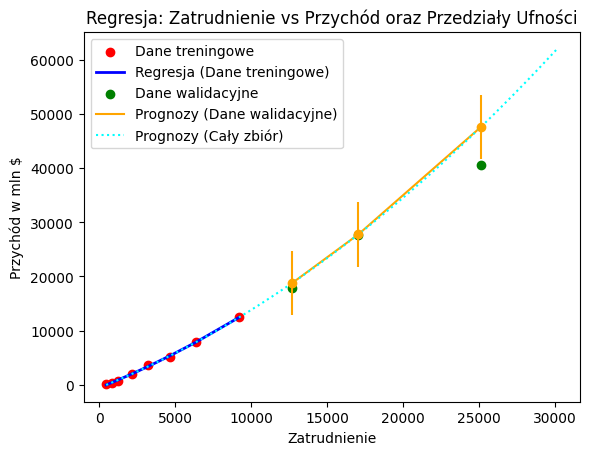

Wzór regresji kwadratowej: y = -526.7069795869229 + 1.119395477790044 * x + 3.175135170954074e-05 * x^2


In [325]:

#3. Przychód(OY)  liczba pracowników (OX)


#model kwadratowy nr 1
# dane testowe pierwsze 6 wartosci, kolejne 3 wartosci to dane walidacyjne
y_train = data["Przychód w mln $"][:8]
y_test = data["Przychód w mln $"][8:]
X_train = data[["Zatrudnienie"]][:8]
X_test = data[["Zatrudnienie"]][8:]


# zmiana danych na wielomianowe stopnia 2
X_train_poly = np.c_[X_train, X_train**2]
X_test_poly = np.c_[X_test, X_test**2]

# trenowanie modelu
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model2.predict(X_test_poly)

print("Współczynniki modelu R^2: ", model2.score(X_test_poly, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

print("Współczynniki modelu R^2: ", model2.score(np.c_[data[["Zatrudnienie"]], data[["Zatrudnienie"]]**2], data["Przychód w mln $"]))
print("Współczynnik modelu RMSE:", mean_squared_error(data["Przychód w mln $"], model2.predict(np.c_[data[["Zatrudnienie"]], data[["Zatrudnienie"]]**2])))


# prognozy dla całego zbioru danych
data["Prognoza_Przychód"] = model2.predict(np.c_[data[["Zatrudnienie"]], data[["Zatrudnienie"]]**2])



# Wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
# Linia przerywana dla regresji danych treningowych
plt.plot(
    X_train,
    model2.predict(X_train_poly),
    color='blue',
    linewidth=2,
    label='Regresja (Dane treningowe)'
)

plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')

# Wydłużenie linii regresji dla całego zbioru
zatrudnienie_extended = np.linspace(data["Zatrudnienie"].min(), data["Zatrudnienie"].max() * 1.2, 500)
prognoza_extended = model2.predict(
    np.c_[zatrudnienie_extended, zatrudnienie_extended**2]
)
# Linia przerywana dla regresji całego zbioru
plt.plot(zatrudnienie_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#bar error
plt.legend()
# Obliczenie reszt modelu (różnice między przewidywaniami a rzeczywistymi wartościami)
residuals = y_test - y_pred_test

# Odchylenie standardowe reszt
std_error = np.std(residuals)

# Wyznaczenie przedziału ufności
confidence_interval = 1.96 * std_error  # 95% przedział ufności

# Dodanie errorbar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=confidence_interval,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
plt.xlabel("Zatrudnienie")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Zatrudnienie vs Przychód oraz Przedziały Ufności")
plt.show()

# wzór regresji kwadratowej

# y = a0 + a1*x + a2*x^2
a0 = model2.intercept_
a1 = model2.coef_[0]
a2 = model2.coef_[1]

print("Wzór regresji kwadratowej:", f"y = {a0} + {a1} * x + {a2} * x^2")



Współczynniki modelu R^2:  0.7789570148784758
Współczynnik modelu RMSE: 19159513.51568353


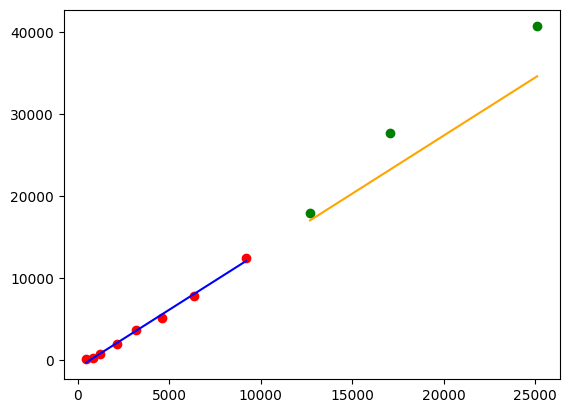

In [326]:
#4. Liczba pracowników (OX) przychód(OY)

# dane treningowe to pierwsze 8 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych
#Dane walidacyjne są używane do oceny jakości modelu
#Następnie przewidujemy wartości dla całego zbioru danych, aby zobaczyć, jak model zachowuje się na całym zbiorze danych

# trenowanie modelu
X_train = data[["Zatrudnienie"]][:8]
X_test = data[["Zatrudnienie"]][8:]
y_train = data["Przychód w mln $"][:8]
y_test = data["Przychód w mln $"][8:]

# trenowanie modelu
model3 = LinearRegression()
model3.fit(X_train, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model3.predict(X_test)

# wypisanie wartości prognozowanych przychodów i wypisanie o ile się różnią od rzeczywistych wartości

print("Współczynniki modelu R^2: ", model3.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, model3.predict(X_train), color='blue', label='Regresja (Dane treningowe)')
plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
# regresja dla danych walidacyjnych
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')

Współczynniki modelu R^2:  -1.23099631834478
Współczynnik modelu RMSE: 305391861.83007896
Współczynniki modelu R^2:  0.8714151219051808
Współczynnik modelu RMSE: 20709789.269111127


D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



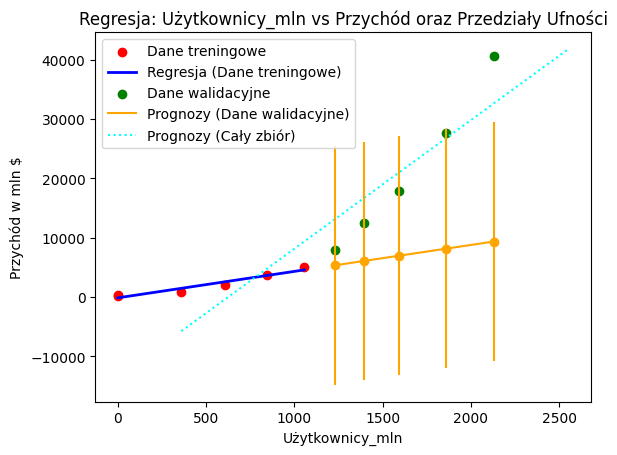

D:\Uczelnia\MEDy\pythonProject\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning:

overflow encountered in exp



In [327]:
# DO PRZEMYŚLENIA
#1. Przychód (OY) od liczby użytkowników (OX)

# dane treningowe to pierwsze 8 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych
#Dane walidacyjne są używane do oceny jakości modelu
#Następnie przewidujemy wartości dla całego zbioru danych, aby zobaczyć, jak model zachowuje się na całym zbiorze danych


# trenowanie modelu
X_train = data[["Użytkownicy_mln"]][:6]
X_test = data[["Użytkownicy_mln"]][6:]
y_train = data["Przychód w mln $"][:6]
y_test = data["Przychód w mln $"][6:]

#usuwanie wartości 0 z danych
data = data[data["Użytkownicy_mln"] != 0]



model1 = LinearRegression()
model1.fit(X_train, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model1.predict(X_test)

# ocena jakości modelu
print("Współczynniki modelu R^2: ", model1.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# drugi model z całym zbiorem danych
model2 = LinearRegression()
model2.fit(data[["Użytkownicy_mln"]], data["Przychód w mln $"])

# ocena jakości modelu
print("Współczynniki modelu R^2: ", model2.score(data[["Użytkownicy_mln"]], data["Przychód w mln $"]))
print("Współczynnik modelu RMSE:", mean_squared_error(data["Przychód w mln $"], model2.predict(data[["Użytkownicy_mln"]])))

# prognozy dla całego zbioru danych
data["Prognoza_Przychód"] = model2.predict(data[["Użytkownicy_mln"]])


# Wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
# Linia przerywana dla regresji danych treningowych
plt.plot(
    X_train,
    model1.predict(X_train),
    color='blue',
    linewidth=2,
    label='Regresja (Dane treningowe)'
)

plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')
# Wydłużenie linii regresji dla całego zbioru
użytkownicy_extended = np.linspace(data["Użytkownicy_mln"].min(), data["Użytkownicy_mln"].max() * 1.2, 500)
prognoza_extended = model2.predict(
    użytkownicy_extended.reshape(-1, 1)
)
# Linia przerywana dla regresji całego zbioru
plt.plot(użytkownicy_extended, prognoza_extended, color='cyan', linestyle='dotted', label='Prognozy (Cały zbiór)')
#bar error
plt.legend()
# Obliczenie reszt modelu (różnice między przewidywaniami a rzeczywistymi wartościami)
residuals = y_test - y_pred_test

# Odchylenie standardowe reszt
std_error = np.std(residuals)

# Wyznaczenie przedziału ufności
confidence_interval = 1.96 * std_error  # 95% przedział ufności

# Dodanie errorbar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=confidence_interval,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
plt.xlabel("Użytkownicy_mln")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Użytkownicy_mln vs Przychód oraz Przedziały Ufności")
plt.show()




# Nowy model regresji liniowej z funckją wykładniczą
# dane treningowe to pierwsze 6 lat, a dane waliacyjne to ostatnie 3 lata



# trenowanie modelu



X_train_poly = np.c_[X_train, np.exp(X_train)]



# trenowanie modelu
model3 = LinearRegression()



Współczynniki modelu R^2:  0.9419825653067996
Współczynnik modelu RMSE: 2798.799727889784
Prognozy użytkowników na lata 2018-2021:
     Rok  Prognoza_Użytkownicy
2   2009            385.933333
3   2010            596.950000
4   2011            807.966667
5   2012           1018.983333
6   2013           1230.000000
7   2014           1441.016667
8   2015           1652.033333
9   2016           1863.050000
10  2017           2074.066667
0   2018           2285.083333
1   2019           2496.100000
2   2020           2707.116667
3   2021           2918.133333




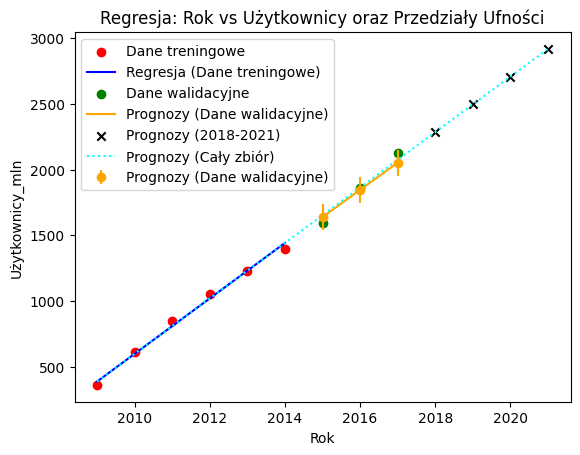

Wzór regresji liniowej: y = -423546.55 + 211.01666666666665 * x


In [328]:
#5. Liczba użytkowników (OY) od czasu (OX)

# dane treningowe to pierwsze 6 rekordów, a dane walidacyjne to ostatnie 3 rekordy
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnyc

# trenowanie modelu
X_train = data[["Rok"]][:6]
X_test = data[["Rok"]][6:]
y_train = data["Użytkownicy_mln"][:6]
y_test = data["Użytkownicy_mln"][6:]

# trenowanie modelu
model4 = LinearRegression()
model4.fit(X_train, y_train)

# prognozy dla danych walidacyjnych
y_pred_test = model4.predict(X_test)

# ocena jakości modelu
print("Współczynniki modelu R^2: ", model4.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

model5 = LinearRegression()
model5.fit(data[["Rok"]], data["Użytkownicy_mln"])

# wypisanie wartosci na lata 2018-2021
X_future = pd.DataFrame({"Rok": [2018, 2019, 2020, 2021]})
data_future = pd.concat([data, X_future], axis=0)
data_future["Prognoza_Użytkownicy"] = model5.predict(data_future[["Rok"]])

print("Prognozy użytkowników na lata 2018-2021:")
print(data_future[["Rok", "Prognoza_Użytkownicy"]])
# przerwa /n
print("\n")


# wykres
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, model5.predict(X_train), color='blue', label='Regresja (Dane treningowe)')
plt.scatter(X_test, y_test, color='green', label='Dane walidacyjne')
plt.plot(X_test, y_pred_test, color='orange', label='Prognozy (Dane walidacyjne)')

# prognozy punktowe dla lat 2018-2021
plt.scatter(data_future[["Rok"]][9:], data_future["Prognoza_Użytkownicy"][9:], color='black', label='Prognozy (2018-2021)', marker='x')
# error bar dla prognozowanych wartości
# Obliczenie reszt modelu (różnice między przewidywaniami a rzeczywistymi wartościami)
residuals = y_test - y_pred_test

# Odchylenie standardowe reszt
std_error = np.std(residuals)

# Wyznaczenie przedziału ufności
confidence_interval = 1.96 * std_error  # 95% przedział ufności

# Dodanie errorbar
plt.errorbar(
    X_test.squeeze(),
    y_pred_test,
    yerr=confidence_interval,
    fmt='o',
    color='orange',
    label='Prognozy (Dane walidacyjne)'
)
# wykres predykcja modelu nr 5 linia przerywana
plt.plot(data_future[["Rok"]], data_future["Prognoza_Użytkownicy"], color='cyan',  linestyle='dotted'  , label='Prognozy (Cały zbiór)')

plt.legend()
plt.xlabel("Rok")
plt.ylabel("Użytkownicy_mln")
plt.title("Regresja: Rok vs Użytkownicy oraz Przedziały Ufności")
plt.show()

#wyliczenie współczynników modelu
a0 = model5.intercept_
a1 = model5.coef_[0]

print("Wzór regresji liniowej:", f"y = {a0} + {a1} * x")





Współczynniki modelu R^2:  0.18822718558685247
Współczynnik modelu RMSE: 0.042144501841318856
Prognozy kosztów na lata 2019-2021:
    Rok  Prognoza_Koszty
0  2018        10.826766
1  2019        11.273834
2  2020        11.720902
3  2021        12.167970


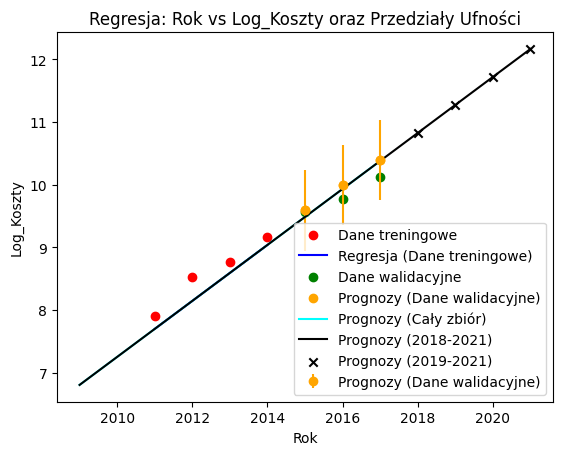

In [329]:
# Logarytmiczna transformacja kosztów i zysków
# dane treningowe to pierwsze 6 lat, a dane waliacyjne to ostatnie 3 lata
#Najpierw trenujemy model na danych treningowych, a następnie przewidujemy wartości dla danych walidacyjnych
#Dane walidacyjne są używane do oceny jakości modelu
#Następnie przewidujemy wartości dla całego zbioru danych, aby zobaczyć, jak model zachowuje się na całym zbiorze danych
#Jeśli model jest dobry, to prognozy dla danych walidacyjnych i całego zbioru danych powinny być zbliżone do siebie
#Następnie robimy przewidywania dla lat od 2019 do 2021

# Logarytmiczna transformacja kosztów i zysków
data["Log_Koszty"] = np.log(data["Koszty w mln $"])
data["Log_Zysk"] = np.log(data["Zysk w mln $"])

X_train= data[["Rok"]][2:6]
X_test = data[["Rok"]][6:]
y_train = data["Log_Koszty"][2:6]
y_test = data["Log_Koszty"][6:]

# Trenowanie modelu
model5 = LinearRegression()
model5.fit(X_train, y_train)

# Prognozy dla danych walidacyjnych
y_pred_test = model5.predict(X_test)

#Ocena jakości modelu
print("Współczynniki modelu R^2: ", model5.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# Uczenie modelu na całym zbiorze danych
model5.fit(data[["Rok"]], data["Log_Koszty"])
data["Prognoza_Koszty"] = model5.predict(data[["Rok"]])

# Przewidywanie kosztów dla lat 2019-2021
X_future = pd.DataFrame({"Rok": [2018, 2019, 2020, 2021]})
data_future = pd.concat([data, X_future], axis=0)
data_future["Prognoza_Koszty"] = model5.predict(data_future[["Rok"]])

# wypisanie wartości prognozowanych kosztów
print("Prognozy kosztów na lata 2019-2021:")
print(data_future[["Rok", "Prognoza_Koszty"]][9:])

# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model5.predict(X_train), color = 'blue', label='Regresja (Dane treningowe)')
plt.scatter(X_test, y_test, color = 'green', label='Dane walidacyjne')
#punkty prognozowane wraz z przedziałami ufności pionowymi 0.95
plt.errorbar(X_test, y_pred_test, yerr=1.96 * np.std(y_pred_test), fmt='o', color = 'orange', label='Prognozy (Dane walidacyjne)')
plt.scatter(X_test, y_pred_test, color = 'orange', label='Prognozy (Dane walidacyjne)')
plt.plot(data[["Rok"]], data["Prognoza_Koszty"], color = 'cyan', label='Prognozy (Cały zbiór)')
plt.plot(data_future[["Rok"]], data_future["Prognoza_Koszty"], color = 'black', label='Prognozy (2018-2021)')
#punkty prognozowane
plt.scatter(data_future[["Rok"]][9:], data_future["Prognoza_Koszty"][9:], color = 'black', label='Prognozy (2019-2021)', marker='x')
plt.legend()
plt.xlabel("Rok")
plt.ylabel("Log_Koszty")
plt.title("Regresja: Rok vs Log_Koszty oraz Przedziały Ufności")
plt.show()


# zmienic zeby dane testowe trzeba wyliczyć samemu z funkcji a te uzyc całkowicie do wytrainowania modelu


In [330]:
# wykresy

fig = px.scatter_matrix(data)
fig.show()
 